# Final Project

*Name(s):*

Recall the 7-state model of the mammalian circadian clock published by <a href="https://drive.google.com/file/d/1BkSA0St3JU0IqY9zAi8IPq2ZHtgqIVe4/view?usp=share_link">Becker-Weimann et al. (2004)</a>. The paper investigates the relative contributions of positive and negative feedback to oscillator performance. We will be using the model presented in this paper for our final investigation.  

Your goal is to demonstrate your mastery of the topics in this course by understanding and analyzing this model. Each question relates to one topic.

## The Project

<ol>
<li> Kinetics and Motifs: Describe the kinetics used in this model. Be detailed. Be sure to include a discussion of gates (i.e. AND or OR gates). What is the basic network motif used in this model?
    <p><i>Opportunity for thoroughness: To answer the questions about AND/OR gates, make a heat map or surface plot like Uri Alon does in Figure 2.5 of his <a href="https://drive.google.com/file/d/1iU6qBtNaXvoudfHbHrtpUeVSRcgQ6N1u/view?usp=share_link">textbook chapter</a></i>
<li> Model Simulation: Write code to simulate the model using the published parameters. Follow the same coding conventions used for previous projects. Simulate the model and recreate Figure 3A of the paper.
    <li> Numerical Solvers: Using the <code>%timeit</code> magic code, compare the time it takes to simulate the model using RK23, RK45, DOP853, Radau, BDF, and LSODA (read the descriptions in the documentation for <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html">solve_ivp</a>). Use a relative tolerance of $10^{-8}$, the default absolute tolerance, an end ``time'' of at least 2400 hours, and no <code>t_eval</code> parameter. RK23 is a low-order explicit solver, RK45 is a high-order explicit solver, DOP853 is an even higher order explicit solver, BDF is a variable-order implicit solver, Radau is a high-order implicit solver, and LSODA is an all-purpose solver (it makes lots of adjustments while solving the problem). 
        <ol>
        <li>Do your run-times makes sense given these descriptions? Explain your answer. 
        <li>Examine how many steps the solver took (sol.t.size). How do they relate to the run times?
        <li>To answer the previous question, it is probably a good idea to re-run the timing with a relative tolerance of $10^{-3}$. This way, you can compare run-times and step counts based on tolerance.
        <li>Is there a clear difference in runtimes between the explicit and implicit solvers? If the implicit solvers are faster, that implies the ODEs are <a href="https://en.wikipedia.org/wiki/Stiff_equation">stiff</a>. You don't need to write about stiffness here, but I am mentioning it now because I briefly mentioned it when we talked about numerical solvers. Stiff systems are particularly difficult to solve with the kinds of (explicit) solvers we wrote. Is this system one of those?
        </ol>
<li> Sensitivity Analysis: Perform a sensitivity analysis of the model. You may decide what you want to find the sensitivity to (the period, the amplitude of a given state, the peak of a given state, etc.). Discuss any clear similarities or stark contrasts with the results from Leloup & Goldbeter's 2004 JTB paper.
</ol>

## Extensions

To receive a grade higher than a B+, you will want to include at least one extension. Here are a few possible extensions:

<ul>
<li> Apply the sensitivity analysis of Stelling et al (2004) to the mammalian model:
	<ul>
        <li>Rank the parameters from most to least sensitive. In keeping with the analysis of Stelling et al. the rank should be 0 for the most sensitive and 1 for the least sensitive. In other words, if parameter $i$ is the least sensitive, then its ``raw rank'' is 1 and if parameter $j$ is the most sensitive, then its raw rank is $N_p$ (where $N_p$ is the number of parameters). To convert from raw rank to rank, use
    <code>
    rank = (NP - raw_rank)/(NP-1);</code>
    <li> Can you come to the same conclusions about this model as Stelling et al. came to regarding the fly clock models?
    </ul>
<li>Sample parameter space and perform sensitivity analysis at each of the new parameter sets (but only for those parameter sets that cause the system to oscillate). Compute the sensitivity rankings for each parameter set. Use them to produce a figure like Figure 2 by Stelling et al. (2004).
<li>Reproduce figures from Becker-Weimann et al (2004). Be sure to include a discussion of your approach and the meaning of the figure.
</ul>

### References

S Becker-Weimann, J Wolf, H Herzel, and A Kramer, "Modeling Feedback Loops of the Mammalian Circadian Oscillator", *Biophys. J.*, 2004

J Stelling, ED Gilles, and FJ Doyle III, "Robustness properties of circadian clock architectures", *Proc. Natl. Acad. Sci*, 2004

J-C Leloup and A Goldbeter, "Modeling the mammalian circadian clock: Sensitivity analysis and multiplicity of oscillatory mechanisms", *J. theor. Biol.*, 2004.

## Notes

To time the solvers, use the magic command %timeit. If you are running it for lots of tolerances and lots of methods, then it will probably be helpful to store the timing results in variables. The documentation about this feature of timeit is rather sparse, but I figured out how to get it to work as long as the only code in the cell is the code that calls the solver. Then, the cell immediately following it should assign the variable. e.g.

In the first cell
<code>
    %timeit -o sol = scipy.integrate.solve_ivp(fun=beckerWeimann_model, t_span=(0,10*24), y0=yinit, method='RK45', args=[params], rtol=1e-8 )
    </code>
    
and in the second cell, do the assignent from the special variable \_. Below, I show the code and then include print statements that will guide you in your understanding of that variable.
<code>
rk45_time = _    
print( rk45_time )
print( rk45_time.average )
print( rk45_time.stdev )    
</code>

Unfortunately, I am not sure how to have multiple calls in the same cell. But I think the variable is still useful  if you have a different variable name for each call, the you can put them in a list in a later cell, so that you can plot them all together.



## 1

In [5]:
# Start code and write-up here.
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

## 2

In [6]:
def weimann_04(t,y,params):

    # Unpack parameters
    v_1b = params[0]
    k_1b = params[1]
    k_1i = params[2]
    c = params[3]
    p = params[4]
    k_1d = params[5]
    k_2b = params[6]
    q = params[7]
    k_2d = params[8]
    k_2t = params[9]
    k_3t = params[10]
    k_3d = params[11]
    v_4b = params[12]
    k_4b = params[13]
    r = params[14]
    k_4d = params[15]
    k_5b = params[16]
    k_5d = params[17]
    k_5t = params[18]
    k_6t = params[19]
    k_6d = params[20]
    k_6a = params[21]
    k_7a = params[22]
    k_7d = params[23]

    # Unpack Y 1-7
    y1 = y[0]
    y2 = y[1]
    y3 = y[2]
    y4 = y[3]
    y5 = y[4]
    y6 = y[5]
    y7 = y[6]

    # Calculating transition rates
    trans_per_cry2 = (v_1b *(y7 +c))/(k_1b*(1+(y3/k_1i)**p)+y7+c)
    trans_bmall = (v_4b*y3**r)/(k_4b**r * y3**r)

    # calculating the 7 differential equations
    dy1_dt = trans_per_cry2 - k_1d*y1
    dy2_dt = k_2b*y1**q - k_2d*y2 - k_2t*y2 + k_3t*y3
    dy3_dt = k_2t*y2 - k_3t*y3 - k_3d*y3
    dy4_dt = trans_bmall - k_4d*y4
    dy5_dt = k_5b*y4 - k_5d*y5 - k_5t*y5 + k_6t*y6
    dy6_dt = k_5t*y5 - k_6t*y6 - k_6d*y6 + k_7a*y7 - k_6a*y6
    dy7_dt = k_6a*y6 - k_7a*y7 - k_7d*y7

    return [dy1_dt, dy2_dt, dy3_dt, dy4_dt, dy5_dt, dy6_dt, dy7_dt]


In [7]:
# Defining the published parameters from Becker-Weimann et al. (2004)
params = [9,1,0.56,0.01,8,0.12,0.3,2,0.05,0.24,0.02,0.12,3.6,2.16,
          3,0.75,0.24,0.06,0.45,0.06,0.12,0.09,0.003,0.09]

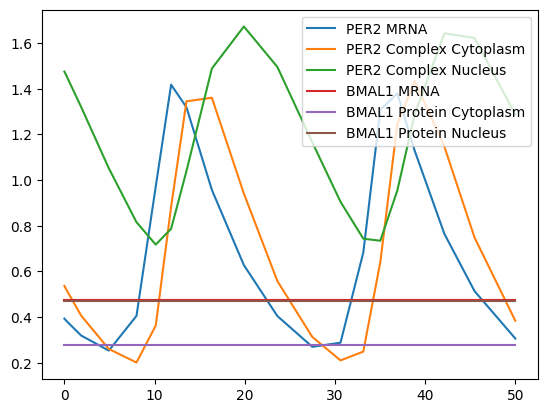

In [20]:
# Simulating the model for 50 hours
# t = np.linspace(0,50,1000)
yinit = np.ones(7)


# solve the model for 10 days
results = scipy.integrate.solve_ivp(fun=weimann_04, t_span=(0,10*24), y0=yinit, args=[params], method='RK45')

# Take the last y values then run the simulation for 50 hours
yinit = results.y[:,-1]
results = scipy.integrate.solve_ivp(fun=weimann_04, t_span=(0,50), y0=yinit, args=[params], method='RK45')




# plotting the results
plt.plot(results.t[-50:], results.y[0,-50:], label='PER2 MRNA')
plt.plot(results.t[-50:], results.y[1,-50:], label='PER2 Complex Cytoplasm')
plt.plot(results.t[-50:], results.y[2,-50:], label='PER2 Complex Nucleus')
plt.plot(results.t[-50:], results.y[3,-50:], label='BMAL1 MRNA')
plt.plot(results.t[-50:], results.y[4,-50:], label='BMAL1 Protein Cytoplasm')
plt.plot(results.t[-50:], results.y[5,-50:], label='BMAL1 Protein Nucleus')
# plt.plot(results.t[-50:], results.y[6,-50:], label='Npas2')
plt.legend()


<hr style="border:2px solid gray"> </hr>

Acknowledgements

*Replace this text with links to external resources and thanks to people you worked with.*